<a href="https://colab.research.google.com/github/zhirongwang94/csm148/blob/main/project1/Project1_first_submit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [35 pts] Visualizing Data 


### [5 pts] Load the data + statistics

- load the dataset
- display the first few rows of the data


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!ls ./gdrive/MyDrive/datasets/

airbnb	housing


In [8]:
import pandas as pd                     
import matplotlib.pyplot as plt          # plotting
import numpy as np                       # dense matrices


# load the dataset, read airbnb.csv file into a panda dataFrame 
csv_path = './gdrive/MyDrive/datasets/airbnb/AB_NYC_2019.csv'
airbnb = pd.read_csv(csv_path)

# display the first 5 row of airbnb data
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


- pull up info on the data type for each of the data fields. Will any of these be problemmatic feeding into your model (you may need to do a little research on this)? Discuss:

In [9]:
#  pull up info on the data type for each of the data field. 
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

[Response here]

 yes, there will be some problems when feeding into my model sine some field data type are objece. I might need to catoglorize them into integers.

- drop the following columns: name, host_id, host_name, and last_review
- display a summary of the statistics of the loaded data

In [10]:
# drop some columns
airbnb = airbnb.drop(['name', 'host_id', 'host_name', 'last_review'], axis=1)
airbnb.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### [5 pts] Boxplot 3 features of your choice

- plot boxplots for 3 features of your choice

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


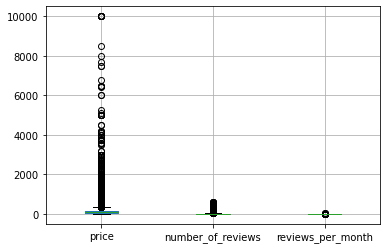

In [11]:
 boxplot = airbnb.boxplot(column=['price', 'number_of_reviews', 'reviews_per_month'])

- describe what you expected to see with these features and what you actually observed 

[Response here]

High variability in price with long tail values, review numbers much more compact, however availability has a wider variance.

I expected to see so visible box in the graph, but these box are too narrow to see. If I just choose one of these three feature to boxplot, the box will be more visible. 

### [10 pts] Plot average price of a listing per neighbourhood_group

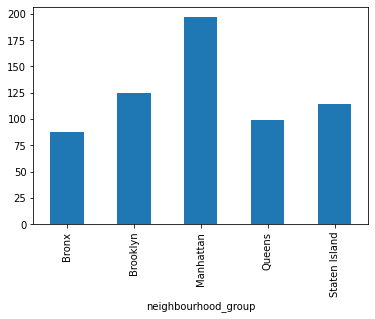

In [12]:
argPrice_neighbourGroup = airbnb.groupby(['neighbourhood_group'])['price'].mean()
argPrice_neighbourGroup.plot.bar()


- describe what you expected to see with these features and what you actually observed 

[Response here]

I expected to see a column of neighbourhood_group and a column of prices corresponding to that neighbourhood_group. And this is what is actually observed. 

- So we can see different neighborhoods have dramatically different pricepoints, but how does the price breakdown by range. To see let's do a histogram of price by neighborhood to get a better sense of the distribution.

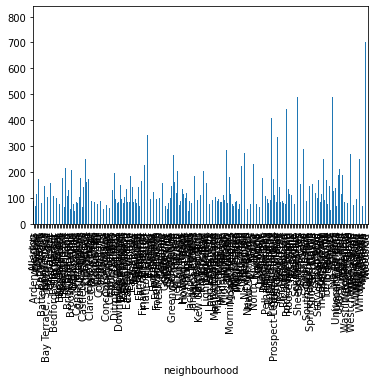

In [13]:
argPrice_neighbour = airbnb.groupby(['neighbourhood'])['price'].mean()
argPrice_neighbour.plot.bar()

### [5 pts] Plot map of airbnbs throughout New York (if it gets too crowded take a subset of the data, and try to make it look nice if you can :) ). 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

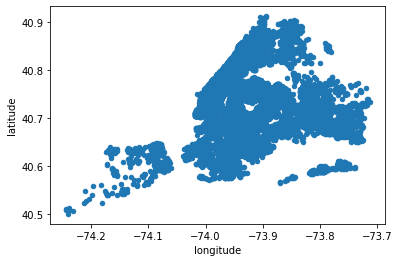

In [14]:
airbnb.info()
airbnb.plot(kind="scatter", x="longitude", y="latitude")

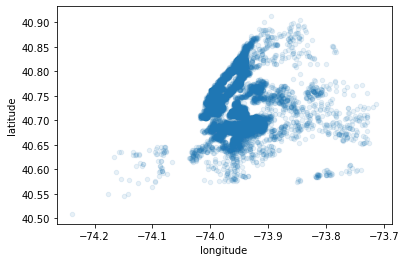

In [15]:
# scatters above are too crowded, i plot every 5th row instead
#  and i use alpha parameter to plot less dense areas lighter. 
airbnb_every_other_row = airbnb.iloc[ ::5, :]
airbnb_every_other_row.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

### [5 pts] Plot average price of room types who have availability greater than 180 days and neighbourhood_group is Manhattan 

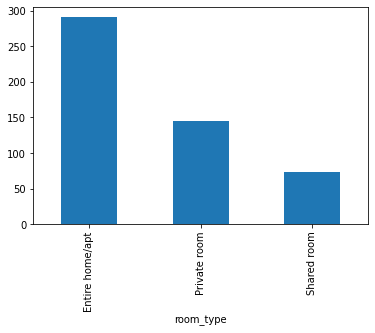

In [16]:
airbnb_selected = airbnb.loc[ (airbnb['availability_365'] > 180) & (airbnb['neighbourhood_group'] == 'Manhattan') ]
argPrice_roomType = airbnb_selected.groupby(['room_type'])['price'].mean()
argPrice_roomType.plot.bar()

### [5 pts] Plot correlation matrix
- which features have positive correlation?
- which features have negative correlation?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e456baa50>,
      dtype=object)

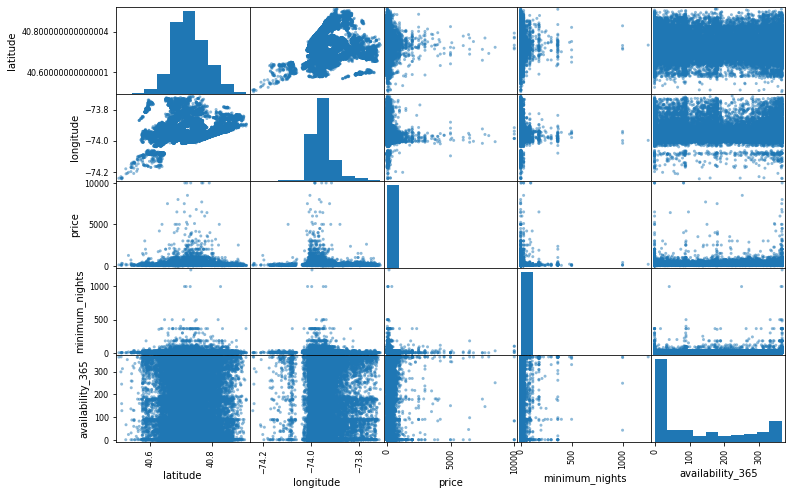

In [27]:
corr_matrix = airbnb.corr()
corr_matrix

from pandas.plotting import scatter_matrix

attributes = [
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'availability_365']

scatter_matrix(airbnb[attributes], figsize=(12, 8))


[Response here]

Availability_365, calculated_host_listings_count, minimum_nights, latitude,host_id, and id features have positive to price feature.
reviews_per_month, number_of_reviews, andlongitude feature have negative correlation to price feature.

# [30 pts] Prepare the Data

### [5 pts] Augment the dataframe with two other features which you think would be useful

In [28]:
airbnb['max_number_of_rents'] = airbnb['availability_365'] / airbnb['minimum_nights']
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
 12  max_number_of_rents             

### [5 pts] Impute any missing feature with a method of your choice, and briefly discuss why you chose this imputation method

In [45]:
sample_incomplete_rows = airbnb[airbnb.isnull().any(axis=1)]
median = sample_incomplete_rows['reviews_per_month'].median()

# output: median is nah

# After analyzing the data, i know that 10052 row of data has null values in the 'reviews_per_month' feature, 
# These values are null because the number_of_reviews are 0. 
# Thus, i can simply fill these null values with 0/ 

airbnb['reviews_per_month'].fillna(0, inplace=True)

# This should output an empty dataframe
airbnb[airbnb.isnull().any(axis=1)]


,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,max_number_of_rents


In [55]:
airbnb_feature

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,max_number_of_rents
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,0.21,6,365,365.000000
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,0.38,2,355,355.000000
2,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,0.00,1,365,121.666667
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,270,4.64,1,194,194.000000
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,0.10,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,2,0,0.00,2,9,4.500000
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,4,0,0.00,2,36,9.000000
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,10,0,0.00,1,27,2.700000
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,1,0,0.00,6,2,2.000000


### [15 pts] Code complete data pipeline using sklearn mixins

In [98]:
# According to Piazza, 'neighborhood' feature has too many values, 
# so it's a better idea to drop the entire feature. 
# id should not be included in the feature. 
# price is the label 
airbnb_features = airbnb.drop(['id', 'price','neighbourhood'], axis=1 )
airbnb_labels = airbnb['price'].copy()

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin




num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        #  ('attribs_adder', AugmentFeatures()),
        ('std_scaler', StandardScaler()),
    ])

# airbnb categorical features are: 'neighbourhood_group', 'room_type'
airbnb_num = airbnb_features.drop(['room_type', 'neighbourhood_group'], axis=1)


numerical_features = list(airbnb_num)
categorical_features = ['room_type', 'neighbourhood_group']


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(), categorical_features),
    ])

airbnb_prepared = full_pipeline.fit_transform(airbnb_features)

airbnb_prepared

array([[-1.49384920e+00, -4.37652087e-01, -2.93996210e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.52436023e-01, -6.84639148e-01, -2.93996210e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.46839948e+00,  2.22496662e-01, -1.96484417e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.57348017e+00,  7.58210126e-02,  1.44806857e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.23773529e-01, -8.43880805e-01, -2.93996210e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.43525178e-01, -8.05099504e-01, -1.46083215e-03, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [95]:
numerical_features

['latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'max_number_of_rents']

In [96]:
categorical_features

['room_type', 'neighbourhood_group']

In [97]:
airbnb_prepared[0]

array([-1.4938492 , -0.43765209, -0.29399621, -0.32041358, -0.55151094,
       -0.03471643,  1.91625031,  3.59673033,  0.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ])

### [5 pts] Set aside 20% of the data as test test (80% train, 20% test).

In [100]:
from sklearn.model_selection import train_test_split
data_target = airbnb['price']
train, test, target, target_test = train_test_split(airbnb_prepared, data_target, test_size=0.2, random_state=0)

# [15 pts] Fit a model of your choice

The task is to predict the price, you could refer to the housing example on how to train and evaluate your model using MSE.
Provide both test and train set MSE values.

In [116]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train, target)

from sklearn.metrics import mean_squared_error

preds = lin_reg.predict(test)


#  evaluate your model using MSE
mse = mean_squared_error(target_test, preds)
rmse = np.sqrt(mse)
rmse

220.58625267762417